In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# numpy formatting (supress scientific notation)
np.set_printoptions(suppress=True, precision=12)

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# import data
df_LF = pd.read_pickle('df_LF_grouped_cleaned.pickle')
df_FD = pd.read_pickle('df_FD_cleaned.pickle')
df_SD = pd.read_pickle('df_SD_cleaned.pickle')

In [2]:
# impute standardised lengths where missing
# STD length = (1.0143 * Fork Length Frozen) + 4.557 rounded to the nearest mm
query = (df_FD.FL_STD.isnull()) & ((df_FD.FL_WET.notnull()) | (df_FD.FL_FROZEN.notnull()))
df_FD.loc[query, 'FL_STD'] = (df_FD.loc[query, 'FL_FROZEN'] * 1.0143 + 4.557).fillna(df_FD.loc[query, 'FL_WET']).round().astype(int)

# make a dataframe with non-null data
df = df_FD[['FL_STD', 'WEIGHT']].dropna()

In [3]:
from scipy.optimize import curve_fit

def weight(length, a, b):
    return a * length ** b

# fit the curve
popt, pcov = curve_fit(weight, df['FL_STD'], df['WEIGHT'])

In [4]:
# optimal coefficients
popt

array([0.000001904028, 3.345412072851])

In [5]:
weight(250, 0.00000190402798, 3.34541207)

200.34143226404666

In [6]:
# let's check how the estimate works
df['weight_estimate'] = weight(df[['FL_STD']], 0.000001904028, 3.34541207)

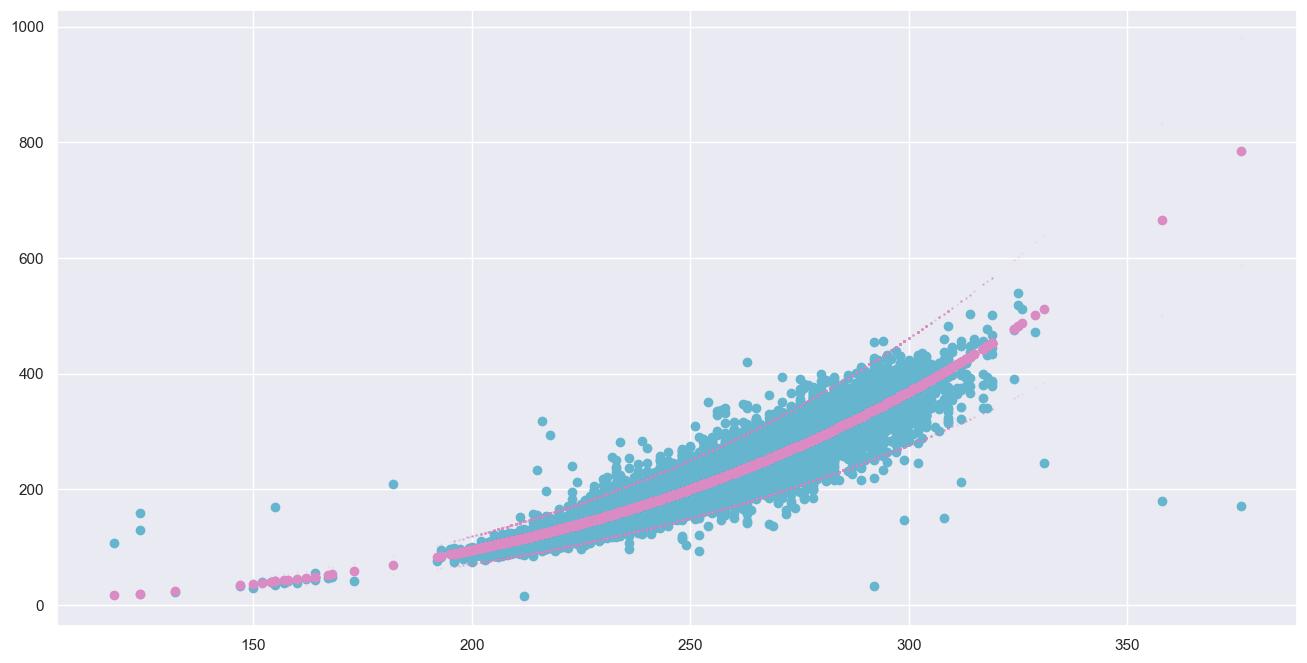

In [7]:
# looks pretty good

plt.figure(figsize=(16,8))
plt.scatter(x=df['FL_STD'], y=df['WEIGHT'], color=sns.color_palette()[9])
plt.scatter(x=df['FL_STD'], y=df['weight_estimate'], color=sns.color_palette()[6])
plt.scatter(x=df['FL_STD'], y=df['weight_estimate']*0.75, color=sns.color_palette()[6], alpha=0.1, s=0.5)
plt.scatter(x=df['FL_STD'], y=df['weight_estimate']*1.25, color=sns.color_palette()[6], alpha=0.1, s=0.5)
plt.show()

### let's check it in local dm_apps before writing it into production
* looks good!
* works better than the old values